In [1]:
# 1) Import all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2) Reading the csv file and assignin it to a variable
df = pd.read_csv('Cars.csv')

In [3]:
# 3) to Display shape of dataframe
df.shape

(398, 9)

In [4]:
# 4) Print all columns of dataframe
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [5]:
# 5) Setting the name column as the index of dataframe
df.set_index('name', inplace=True)

In [6]:
# 6) Printing a list of all the unique mpg values
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [7]:
# GRADED QUESTIONS

# 1. Name of the car with the highest horsepower
df.loc[df['horsepower'].idxmax()]

mpg              16.0
cylinders           8
displacement    400.0
horsepower      230.0
weight           4278
acceleration      9.5
model_year         73
origin            usa
Name: pontiac grand prix, dtype: object

In [13]:
# 2. How many cars have mpg >= 35?
df[df['mpg'] >= 35].shape[0]

36

In [9]:
# 3. Most common origin for cars with horsepower > 100 and weight > 3000?
df[(df['horsepower'] > 100) & (df['weight'] > 3000)]['origin'].mode()[0]

'usa'

In [10]:
# 4. Mean acceleration of cars from Japan (rounded to 2 decimal places)
round(df[df['origin'] == 'japan']['acceleration'].mean(), 2)

16.17

In [11]:
# 5. Car with highest average mpg
df[df['mpg'] == df['mpg'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan


In [17]:
#UNGRADED QUESTIONS

# Find the car(s) with the best horsepower-to-weight ratio and mpg above median
median_mpg = df['mpg'].median()
df_filtered = df[df['mpg'] > median_mpg]
best_power_weight = df_filtered[df_filtered['horsepower'] / df_filtered['weight'] == (df_filtered['horsepower'] / df_filtered['weight']).max()]
best_power_weight

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,europe


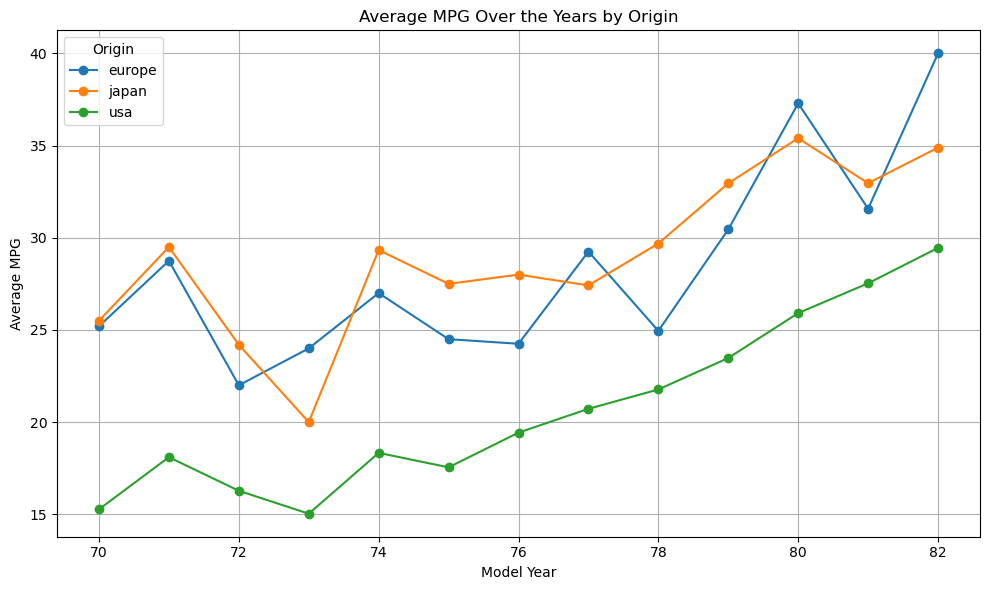

In [16]:
# Multiline plot: average mpg over years for each origin
df_reset = df.reset_index()
avg_mpg = df_reset.groupby(['model_year', 'origin'])['mpg'].mean().unstack()
avg_mpg.plot(marker='o', figsize=(10, 6))
plt.title('Average MPG Over the Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.legend(title='Origin')
plt.tight_layout()
plt.show()

In [ ]:
# Seaborn scatterplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='weight', hue='origin', size='mpg', data=df_reset, palette='deep', sizes=(20, 200))
plt.title('Horsepower vs Weight by Origin (size = mpg)')
plt.show()

In [ ]:
# --- CONSISTENT CAR MODEL TASK ---


df_consistent = df_reset.copy()
grouped = df_consistent.groupby('name').agg({
    'model_year': pd.Series.nunique,
    'mpg': 'std'
}).rename(columns={'model_year': 'year_count', 'mpg': 'mpg_std'})
consistent_cars = grouped[(grouped['year_count'] >= 5) & (grouped['mpg_std'] < 1.0)]
consistent_cars